# Dimensionality Reduction


### What is dimensionality? 

Dimensionality means the number of columns you have in your dataset.

When you have many columns in your dataset (say more than 10), the data is considered high dimensional.If you are new to that dataset it could be hard to find the most important patterns because complexity comes with high dimensionality.

### Why to reduce dimensionality? 

- **Dataset will become simpler**
- **Requires less disk space**
- **Requires less computation time**
-**Have lower chance of overfitting**


### Few Techniques to Reduce Dimensionality


**1.*Removing low variance features***

If the variance is low or close to zero, then a feature is approximately constant and will not improve the performance of the model. We can reduce dimensionality by droping that column.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12.0,9.0)

pokemon_df = pd.read_csv('pokemon.csv')

To get a quick overview which column contain little variance we can use describe method.

In [27]:
pokemon_df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Std(Standard Deviation) will be so low or zero for low variance that means mazimum and minimum value will be so close or equal.
Here in **Generation** column we can see standard deviation is so low compared to other columns.As a result we can drop these column to reduce dimensionality as it contains very less information in every observation.

In [28]:
pokemon_df = pokemon_df.drop(columns= ['Generation'] , axis= 1)
pokemon_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,True


We can automate the selection of features that have sufficient variance and not too many missing values by using
Scikit-learn's built-in feature selection tools called VarianceThreshold().



In [29]:
ansur = pd.read_csv('ANSUR_II_MALE.csv')

Scikit-learn's built-in VarianceThreshold() method only accept numerical column or feature

In [30]:
ansur_num_df = ansur.select_dtypes(include=['int', 'float'])

In [31]:
ansur_num_df.shape

(4082, 94)

In [60]:
from sklearn.feature_selection import VarianceThreshold

ansur_num_df.var()  ## Seeing the variances of all features ansur_num_df dataset to estimate threshold

abdominalextensiondepthsitting    1393.318192
acromialheight                    4005.275036
acromionradialelength              305.648126
anklecircumference                 214.596201
axillaheight                      3542.168955
                                     ...     
wristcircumference                  80.193012
wristheight                       1735.191365
weight_kg                          202.228286
stature_m                            0.004699
BMI                                 16.317254
Length: 94, dtype: float64

In [63]:
sel = VarianceThreshold(threshold=10)
sel.fit(ansur_num_df)



VarianceThreshold(threshold=10)

When we create the selector we can set the minimal variance threshold. Here, we've set it to a variance of 10


In [67]:
mask = sel.get_support()

In [68]:
print(mask)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True]


.get_support() method will give us a True or False value on whether each feature's variance is above the threshold or not

We can use this mask to reduce the number of dimensions in our dataset.

In [70]:
reduced_df = ansur_num_df.loc[: , mask]
reduced_df.shape

(4082, 91)

Here we can see 3 features with noticable low variance has been reduced.
Threshold value depends on the variation of dataset

**2.*Features having a lot of missing values***

Real world dataset contains a lot of missing or NAN values.We have to impute those missing values using various techniques. But Theoretically, features having 25 to 30%  maximum missing values are allowed to drop from the dataset.

We can remove that column from the dataset to reduce dimensionality if we want. But again it’s totally depends upon the importance of the variable.

In [79]:
bangalore_house_df = pd.read_csv('Bengaluru_House_Data.csv')
bangalore_house_df.shape

(13320, 9)

Checking the missing values and seeing it in the heatmap

In [73]:
bangalore_house_df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

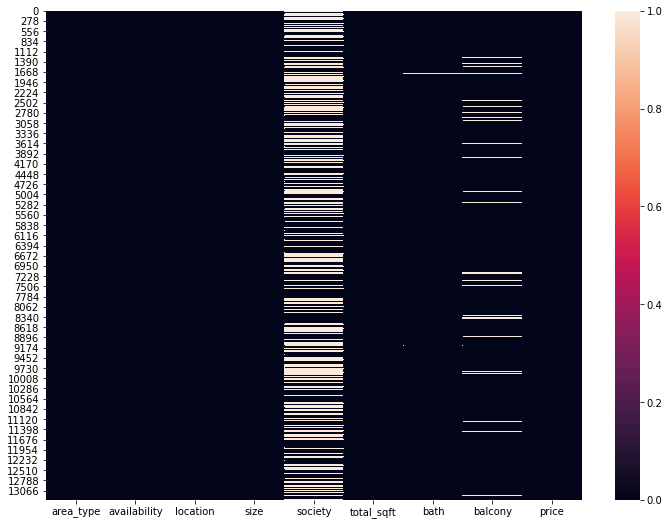

In [74]:
sns.heatmap(bangalore_house_df.isnull())

Seeing the percentage of missing values

In [76]:
missing_val_per = (bangalore_house_df.isnull().sum() / bangalore_house_df.shape[0] ) * 100
missing_val_per

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

Here we can see **society** column have 41.3% of missing values that means almost half of the values are missing in that column.So we can remove it from the dataset to reduce dimensionality.

Now droping the columns which has greater than 25% missing values

In [77]:
drop_columns = missing_val_per[missing_val_per > 25].keys()
drop_columns

Index(['society'], dtype='object')

In [80]:
new_bangalore_house_df = bangalore_house_df.drop(columns= drop_columns)
new_bangalore_house_df.shape

(13320, 8)

**3.*Removing highly correlated features***

In many datasets we find some of the features which are highly correlated that means which are some what linearly dependent with other features. These features contribute very less in predicting the output but increses the computational cost.Correlated features in general don't improve models. So we can reduce one of them between highly correlated two features.

In [83]:
ansur.head()

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,...,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,...,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,...,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,...,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal
3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,...,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,176,793,79.4,1.655,28.988417,Overweight,Normal
4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,...,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,188,954,94.6,1.914,25.823034,Overweight,Tall


In [84]:
height_arr = ['acromialheight', 'axillaheight', 'buttockheight', 'cervicaleheight' , 'chestheight', 'poplitealheight', 'sittingheight', 'tenthribheight', 'tibialheight', 'wristheight']

In [102]:
height_df = ansur[height_arr]
height_df.head()

,acromialheight,axillaheight,buttockheight,cervicaleheight,chestheight,poplitealheight,sittingheight,tenthribheight,tibialheight,wristheight
0,1467,1347,882,1535,1292,437,928,1092,491,853
1,1395,1293,870,1471,1244,417,884,1076,476,815
2,1430,1327,901,1501,1288,431,917,1105,477,831
3,1347,1239,821,1423,1205,393,903,1021,445,793
4,1585,1478,1080,1684,1452,523,919,1292,584,954


In [103]:
height_df.shape

(4082, 10)

Now we are creating a square matrix with dimensions equal to the number of features. In which we will have the elements as the absolute value of correlation between the features.

In [90]:
## Creating positive correlation matrix
corr_matrix = height_df.corr().abs()
print(corr_matrix)

                 acromialheight  axillaheight  ...  tibialheight  wristheight
acromialheight         1.000000      0.982420  ...      0.867264     0.897837
axillaheight           0.982420      1.000000  ...      0.881481     0.866922
buttockheight          0.834523      0.853572  ...      0.874379     0.674436
cervicaleheight        0.977008      0.973911  ...      0.881371     0.860432
chestheight            0.948300      0.956800  ...      0.871278     0.834689
poplitealheight        0.837359      0.866236  ...      0.905300     0.652195
sittingheight          0.702364      0.684339  ...      0.462340     0.721322
tenthribheight         0.936778      0.942308  ...      0.883229     0.806314
tibialheight           0.867264      0.881481  ...      1.000000     0.699208
wristheight            0.897837      0.866922  ...      0.699208     1.000000

[10 rows x 10 columns]


Here we can see the correlation value r of the height_df.The value of r always lies between minus one and plus one. Minus one describes a perfectly negative correlation, zero describes no correlation at all and plus one stands for a perfect positive correlation.
From the highly correlated features pair, one of the feature can be dropped to reduce dimensionality.

We can also visualize correlation using heatmap

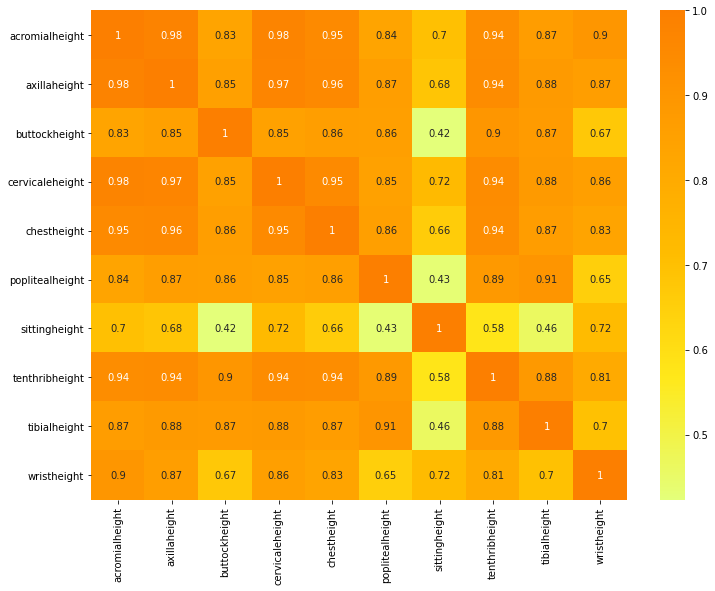

In [91]:
sns.heatmap(height_df.corr() , cmap = 'Wistia' , annot = True)

We can improve this plot further by removing duplicate and unnecessary information like the correlation coefficients of one on the diagonal.
To do so we'll create a boolean mask. We use NumPy's ones_like() function to create a matrix filled with True values with the same dimensions as our correlation matrix and then pass this to NumPy's triu(), for triangle upper, function to set all non-upper triangle values to False.


In [93]:
#Create and apply mask
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

In [94]:
tri_df

,acromialheight,axillaheight,buttockheight,cervicaleheight,chestheight,poplitealheight,sittingheight,tenthribheight,tibialheight,wristheight
acromialheight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
axillaheight,0.982420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buttockheight,0.834523,0.853572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cervicaleheight,0.977008,0.973911,0.848305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chestheight,0.948300,0.956800,0.862893,0.951101,NaN,NaN,NaN,NaN,NaN,NaN
poplitealheight,0.837359,0.866236,0.858621,0.852666,0.858776,NaN,NaN,NaN,NaN,NaN
sittingheight,0.702364,0.684339,0.423160,0.723225,0.663182,0.432433,NaN,NaN,NaN,NaN
tenthribheight,0.936778,0.942308,0.898830,0.943012,0.938269,0.885980,0.576462,NaN,NaN,NaN
tibialheight,0.867264,0.881481,0.874379,0.881371,0.871278,0.905300,0.462340,0.883229,NaN,NaN
wristheight,0.897837,0.866922,0.674436,0.860432,0.834689,0.652195,0.721322,0.806314,0.699208,NaN


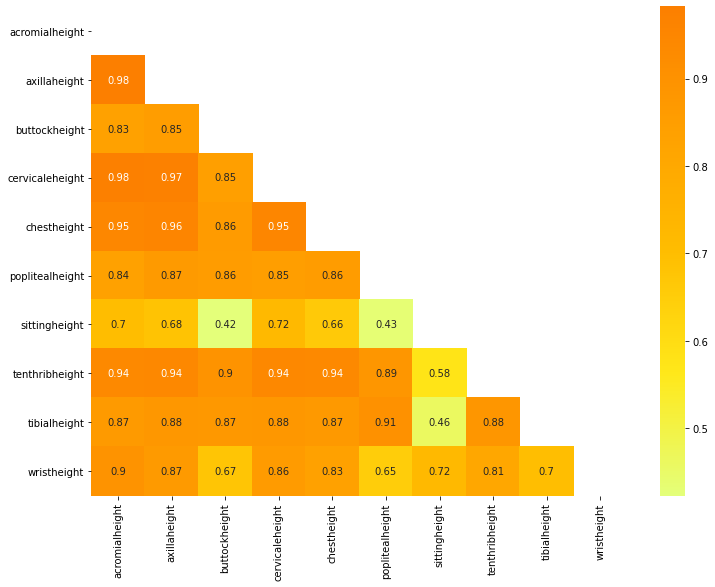

In [97]:
sns.heatmap(height_df.corr() , mask = mask, cmap = 'Wistia' , annot = True)

We can then use a list comprehension to find all columns that have a correlation to any feature stronger than the threshold value. We will set threshold value 0.93 here.

In [119]:
## finding Columns that meets threshold
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.93)]

In [120]:
print(to_drop)

['acromialheight', 'axillaheight', 'cervicaleheight', 'chestheight']


In [121]:
##Dropping these columns
new_height_df = height_df.drop(to_drop, axis=1)
new_height_df.head()

,buttockheight,poplitealheight,sittingheight,tenthribheight,tibialheight,wristheight
0,882,437,928,1092,491,853
1,870,417,884,1076,476,815
2,901,431,917,1105,477,831
3,821,393,903,1021,445,793
4,1080,523,919,1292,584,954


In [122]:
new_height_df.shape

(4082, 6)

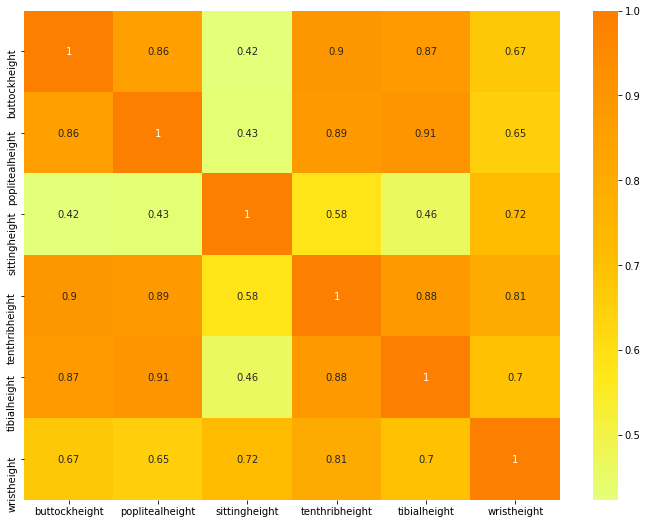

In [123]:
sns.heatmap(new_height_df.corr() , cmap = 'Wistia' , annot = True)

If you like this notebook, please support me by sharing your feedback.It will inspire me a lot. Thank you!